# Downloading Data from landsat with Python

## Setting Up API

In [1]:
from landsatxplore.api import API
import os

# Your USGS credentials
username = os.environ.get('USGS_USERNAME')
password = os.environ.get('USGS_PASSWORD')

dp = os.environ.get('pub_data')
ls_data = dp + 'landsat_data'

# Initialize a new API instance
api = API(username, password)

# Perform a request
response = api.request(endpoint='dataset-catalogs')
print(response)

{'EE': 'EarthExplorer', 'GV': 'GloVis', 'HDDS': 'HDDS Explorer'}


## Searching for scenes

In [ ]:
# Search for Landsat TM scenes
scenes = api.search(
    dataset = 'landsat_ot_c2_l2',
    latitude=36.05388889,
    longitude=120.32000000,
    start_date='2021-01-01',
    end_date='2023-12-31',
    max_cloud_cover=50
)

# log out
api.logout()

In [51]:
import pandas as pd

# Create a DataFrame from the scenes
df_scenes = pd.DataFrame(scenes)
df_scenes = df_scenes[['display_id', 'wrs_path', 'wrs_row', 'satellite', 'cloud_cover', 'acquisition_date']]
df_scenes.sort_values('acquisition_date', ascending=False, inplace=True)

# Print the first 5 scenes
print(len(df_scenes)) # value:55
df_scenes.head()

71


,display_id,wrs_path,wrs_row,satellite,cloud_cover,acquisition_date
0,LC09_L2SP_120035_20231221_20231223_02_T1,120,35,9,11,2023-12-21
1,LC09_L2SP_120035_20231205_20231206_02_T1,120,35,9,3,2023-12-05
2,LC08_L2SP_120035_20231127_20231129_02_T1,120,35,8,11,2023-11-27
3,LC09_L2SP_120035_20231119_20231120_02_T1,120,35,9,2,2023-11-19
4,LC08_L2SP_120035_20231026_20231101_02_T1,120,35,8,0,2023-10-26


## Downloding Data

In [52]:
from landsatxplore.earthexplorer import EarthExplorer as EE
import os
dp = os.environ.get('pub_data')

# Initialize the API
ee = EE(username, password)

# Select the first scene
ID = 'LC09_L2SP_120035_20231221_20231223_02_T1'

# Download the scene
try:
    ee.download(ID, output_dir=dp + 'landsat_data')
    print('{} succesful'.format(ID))

# Additional error handling
except:
    if os.path.isfile(dp + 'landsat_data/{}.tar'.format(ID)):
        print('{} error but file exists'.format(ID))
    else:
        print('{} error'.format(ID))

ee.logout()

Download failed with dataset id 1 of 3. Re-trying with the next one.


853MB [06:43, 2.22MB/s]                             


None of the archived ids succeeded! Update necessary!
LC09_L2SP_120035_20231221_20231223_02_T1 error but file exists


## Working with the data in Python

In [53]:
import tarfile

# Extract files from tar archive
tar = tarfile.open(dp + 'landsat_data/{}.tar'.format(ID))
tar.extractall(dp + 'landsat_data/{}'.format(ID))
tar.close()

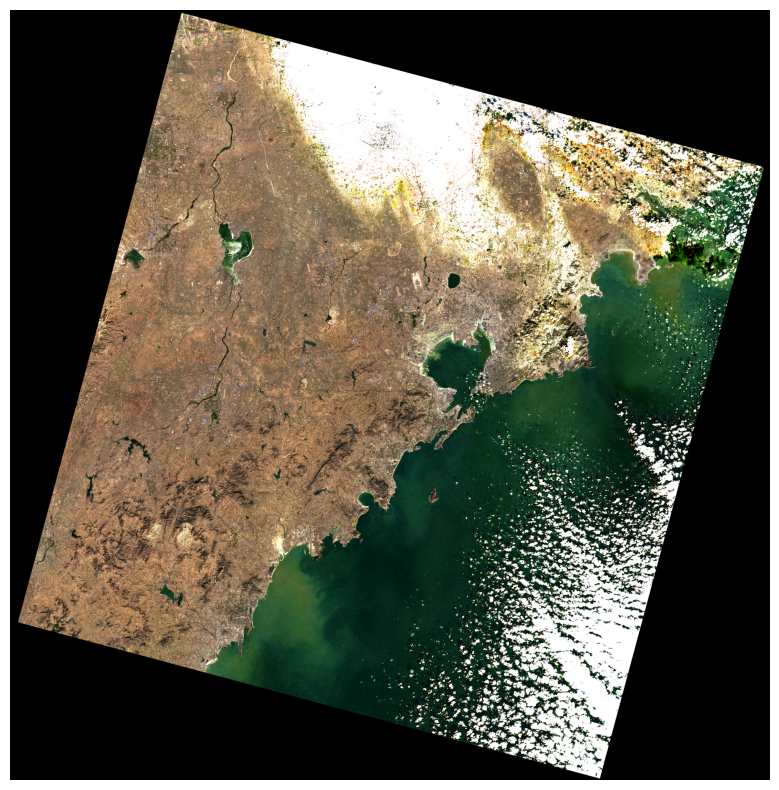

In [65]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

scale_factor = 0.0000275
offset = -0.2

# Load Blue (B2), Green (B3) and Red (B4) bands
B2 = tiff.imread(dp + 'landsat_data/{}/{}_SR_B2.TIF'.format(ID, ID))
B3 = tiff.imread(dp + 'landsat_data/{}/{}_SR_B3.TIF'.format(ID, ID))
B4 = tiff.imread(dp + 'landsat_data/{}/{}_SR_B4.TIF'.format(ID, ID))

# Stack and scale bands
RGB = np.dstack((B4, B3, B2))
RGB = np.clip(RGB*scale_factor+offset, 0, 1)

# Clip to enhance contrast
RGB = np.clip(RGB,0,0.2)/0.2

# Display RGB image
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(RGB)
ax.set_axis_off()


In [ ]:
plt.imshow()